In [2]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/0d/95/8398287a3a00d006ebbe5fcada88bb2536acde2beecce892ff091e1c1a3b/soxr-0.3.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   -

In [15]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8f/db/e05a35451d4ba30fdc65ef168dfdc68a6939ea6afd

In [18]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
pip install --upgrade tensorflow keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# music_processor

In [2]:
import json
import os
import math
import librosa
import numpy as np


# Путь к набору данных и JSON-файлу
DATASET_PATH = "DataSet"
JSON_PATH = "data.json"

SAMPLE_RATE = 22050  # Частота дискретизации
TRACK_DURATION = 30  # Продолжительность трека в секундах
NUM_SEGMENTS = 5 # Количество сегментов, на которые разбивается фрагмент трека

SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION  # Количество образцов на трек
SAMPLES_PER_SEGMENT = int(SAMPLES_PER_TRACK / NUM_SEGMENTS)  # Количество образцов на сегмент

HOP_LENGTH = 512 # Шаг окна для FFT, измеряется в количестве образцов
NUM_MFCC_VECTORS_PER_SEGMENT = math.ceil(SAMPLES_PER_SEGMENT / HOP_LENGTH)  # Количество MFCC векторов на сегмент
N_FFT = 2048 # Интервал для применения FFT, измеряется в количестве образцов
NUM_MFCC = 13 # Количество коэффициентов для извлечения мел-частотных кепстральных коэффициентов


def get_music_mfcc(file_path):
    """ Извлекает MFCC из указанного аудиофайла, начиная с определенного места.
    
    :param file_path: Путь к аудиофайлу.
    :return: MFCC в виде numpy массива или null, если количество векторов MFCC не соответствует ожиданиям.
    """
    
    TRACK_STEP_AFTER_START = 25 # Секунда, с которой берется образец трека для распознавания 
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE) # Загрузка аудиофайла
    
    start = SAMPLES_PER_SEGMENT * TRACK_STEP_AFTER_START
    finish = start + SAMPLES_PER_SEGMENT
    
    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=SAMPLE_RATE, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
    
    mfcc = mfcc.T

    # Сохранение только тех MFCC, которые имеют ожидаемое количество векторов
    return np.array(mfcc.tolist())
    

def prepare_music_dataset():
    """ Извлекает MFCC из набора данных музыки и сохраняет их в JSON файл вместе с метками жанров.
    
    :param dataset_path: Путь к набору данных
    :param json_path: Путь к JSON файлу для сохранения MFCC
    :param num_mfcc: Количество коэффициентов для извлечения
    :param n_fft: Интервал для применения FFT, измеряется в количестве образцов
    :param hop_length: Скользящее окно для FFT, измеряется в количестве образцов
    :param num_segments: Количество сегментов, на которые мы хотим разделить образцы треков
    :return: None
    """
        
    # Словарь для хранения соответствий, меток и MFCC
    data = { "mapping": [], "labels": [], "mfcc": [] }

    # Проход по всем подкаталогам с жанрами
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):

        # Убедиться, что мы обрабатываем уровень подкаталога жанра
        if not os.path.samefile(dirpath, DATASET_PATH):

            # Сохранить жанровую метку (имя подкаталога) в соответствие
            semantic_label = os.path.basename(dirpath)
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # Обработка всех аудиофайлов в подкаталоге жанра
            for f in filenames:

                # Загрузка аудиофайла
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # Обработка всех сегментов аудиофайла
                for d in range(NUM_SEGMENTS):

                    # Расчет начала и конца текущего сегмента
                    start = SAMPLES_PER_SEGMENT * d
                    finish = start + SAMPLES_PER_SEGMENT

                    # Извлечение MFCC
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=SAMPLE_RATE, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                    mfcc = mfcc.T

                    # Сохранение только тех MFCC, которые имеют ожидаемое количество векторов
                    if len(mfcc) == NUM_MFCC_VECTORS_PER_SEGMENT:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # Сохранение MFCC в JSON файл
    with open(JSON_PATH, "w") as fp:
        json.dump(data, fp, indent=4)


In [2]:
if __name__ == "__main__":
    prepare_music_dataset()


Processing: blues
DataSet\blues\blues.00000.wav, segment:1
DataSet\blues\blues.00000.wav, segment:2
DataSet\blues\blues.00000.wav, segment:3
DataSet\blues\blues.00000.wav, segment:4
DataSet\blues\blues.00000.wav, segment:5
DataSet\blues\blues.00001.wav, segment:1
DataSet\blues\blues.00001.wav, segment:2
DataSet\blues\blues.00001.wav, segment:3
DataSet\blues\blues.00001.wav, segment:4
DataSet\blues\blues.00001.wav, segment:5
DataSet\blues\blues.00002.wav, segment:1
DataSet\blues\blues.00002.wav, segment:2
DataSet\blues\blues.00002.wav, segment:3
DataSet\blues\blues.00002.wav, segment:4
DataSet\blues\blues.00002.wav, segment:5
DataSet\blues\blues.00003.wav, segment:1
DataSet\blues\blues.00003.wav, segment:2
DataSet\blues\blues.00003.wav, segment:3
DataSet\blues\blues.00003.wav, segment:4
DataSet\blues\blues.00003.wav, segment:5
DataSet\blues\blues.00004.wav, segment:1
DataSet\blues\blues.00004.wav, segment:2
DataSet\blues\blues.00004.wav, segment:3
DataSet\blues\blues.00004.wav, segment

DataSet\blues\blues.00043.wav, segment:1
DataSet\blues\blues.00043.wav, segment:2
DataSet\blues\blues.00043.wav, segment:3
DataSet\blues\blues.00043.wav, segment:4
DataSet\blues\blues.00043.wav, segment:5
DataSet\blues\blues.00044.wav, segment:1
DataSet\blues\blues.00044.wav, segment:2
DataSet\blues\blues.00044.wav, segment:3
DataSet\blues\blues.00044.wav, segment:4
DataSet\blues\blues.00044.wav, segment:5
DataSet\blues\blues.00045.wav, segment:1
DataSet\blues\blues.00045.wav, segment:2
DataSet\blues\blues.00045.wav, segment:3
DataSet\blues\blues.00045.wav, segment:4
DataSet\blues\blues.00045.wav, segment:5
DataSet\blues\blues.00046.wav, segment:1
DataSet\blues\blues.00046.wav, segment:2
DataSet\blues\blues.00046.wav, segment:3
DataSet\blues\blues.00046.wav, segment:4
DataSet\blues\blues.00046.wav, segment:5
DataSet\blues\blues.00047.wav, segment:1
DataSet\blues\blues.00047.wav, segment:2
DataSet\blues\blues.00047.wav, segment:3
DataSet\blues\blues.00047.wav, segment:4
DataSet\blues\bl

DataSet\blues\blues.00085.wav, segment:1
DataSet\blues\blues.00085.wav, segment:2
DataSet\blues\blues.00085.wav, segment:3
DataSet\blues\blues.00085.wav, segment:4
DataSet\blues\blues.00085.wav, segment:5
DataSet\blues\blues.00086.wav, segment:1
DataSet\blues\blues.00086.wav, segment:2
DataSet\blues\blues.00086.wav, segment:3
DataSet\blues\blues.00086.wav, segment:4
DataSet\blues\blues.00086.wav, segment:5
DataSet\blues\blues.00087.wav, segment:1
DataSet\blues\blues.00087.wav, segment:2
DataSet\blues\blues.00087.wav, segment:3
DataSet\blues\blues.00087.wav, segment:4
DataSet\blues\blues.00087.wav, segment:5
DataSet\blues\blues.00088.wav, segment:1
DataSet\blues\blues.00088.wav, segment:2
DataSet\blues\blues.00088.wav, segment:3
DataSet\blues\blues.00088.wav, segment:4
DataSet\blues\blues.00088.wav, segment:5
DataSet\blues\blues.00089.wav, segment:1
DataSet\blues\blues.00089.wav, segment:2
DataSet\blues\blues.00089.wav, segment:3
DataSet\blues\blues.00089.wav, segment:4
DataSet\blues\bl

DataSet\classical\classical.00024.wav, segment:2
DataSet\classical\classical.00024.wav, segment:3
DataSet\classical\classical.00024.wav, segment:4
DataSet\classical\classical.00024.wav, segment:5
DataSet\classical\classical.00025.wav, segment:1
DataSet\classical\classical.00025.wav, segment:2
DataSet\classical\classical.00025.wav, segment:3
DataSet\classical\classical.00025.wav, segment:4
DataSet\classical\classical.00025.wav, segment:5
DataSet\classical\classical.00026.wav, segment:1
DataSet\classical\classical.00026.wav, segment:2
DataSet\classical\classical.00026.wav, segment:3
DataSet\classical\classical.00026.wav, segment:4
DataSet\classical\classical.00026.wav, segment:5
DataSet\classical\classical.00027.wav, segment:1
DataSet\classical\classical.00027.wav, segment:2
DataSet\classical\classical.00027.wav, segment:3
DataSet\classical\classical.00027.wav, segment:4
DataSet\classical\classical.00027.wav, segment:5
DataSet\classical\classical.00028.wav, segment:1
DataSet\classical\cl

DataSet\classical\classical.00060.wav, segment:2
DataSet\classical\classical.00060.wav, segment:3
DataSet\classical\classical.00060.wav, segment:4
DataSet\classical\classical.00060.wav, segment:5
DataSet\classical\classical.00061.wav, segment:1
DataSet\classical\classical.00061.wav, segment:2
DataSet\classical\classical.00061.wav, segment:3
DataSet\classical\classical.00061.wav, segment:4
DataSet\classical\classical.00061.wav, segment:5
DataSet\classical\classical.00062.wav, segment:1
DataSet\classical\classical.00062.wav, segment:2
DataSet\classical\classical.00062.wav, segment:3
DataSet\classical\classical.00062.wav, segment:4
DataSet\classical\classical.00062.wav, segment:5
DataSet\classical\classical.00063.wav, segment:1
DataSet\classical\classical.00063.wav, segment:2
DataSet\classical\classical.00063.wav, segment:3
DataSet\classical\classical.00063.wav, segment:4
DataSet\classical\classical.00063.wav, segment:5
DataSet\classical\classical.00064.wav, segment:1
DataSet\classical\cl

DataSet\classical\classical.00097.wav, segment:1
DataSet\classical\classical.00097.wav, segment:2
DataSet\classical\classical.00097.wav, segment:3
DataSet\classical\classical.00097.wav, segment:4
DataSet\classical\classical.00097.wav, segment:5
DataSet\classical\classical.00098.wav, segment:1
DataSet\classical\classical.00098.wav, segment:2
DataSet\classical\classical.00098.wav, segment:3
DataSet\classical\classical.00098.wav, segment:4
DataSet\classical\classical.00098.wav, segment:5
DataSet\classical\classical.00099.wav, segment:1
DataSet\classical\classical.00099.wav, segment:2
DataSet\classical\classical.00099.wav, segment:3
DataSet\classical\classical.00099.wav, segment:4
DataSet\classical\classical.00099.wav, segment:5

Processing: country
DataSet\country\country.00000.wav, segment:1
DataSet\country\country.00000.wav, segment:2
DataSet\country\country.00000.wav, segment:3
DataSet\country\country.00000.wav, segment:4
DataSet\country\country.00000.wav, segment:5
DataSet\country\cou

DataSet\country\country.00035.wav, segment:2
DataSet\country\country.00035.wav, segment:3
DataSet\country\country.00035.wav, segment:4
DataSet\country\country.00035.wav, segment:5
DataSet\country\country.00036.wav, segment:1
DataSet\country\country.00036.wav, segment:2
DataSet\country\country.00036.wav, segment:3
DataSet\country\country.00036.wav, segment:4
DataSet\country\country.00036.wav, segment:5
DataSet\country\country.00037.wav, segment:1
DataSet\country\country.00037.wav, segment:2
DataSet\country\country.00037.wav, segment:3
DataSet\country\country.00037.wav, segment:4
DataSet\country\country.00037.wav, segment:5
DataSet\country\country.00038.wav, segment:1
DataSet\country\country.00038.wav, segment:2
DataSet\country\country.00038.wav, segment:3
DataSet\country\country.00038.wav, segment:4
DataSet\country\country.00038.wav, segment:5
DataSet\country\country.00039.wav, segment:1
DataSet\country\country.00039.wav, segment:2
DataSet\country\country.00039.wav, segment:3
DataSet\co

DataSet\country\country.00072.wav, segment:4
DataSet\country\country.00072.wav, segment:5
DataSet\country\country.00073.wav, segment:1
DataSet\country\country.00073.wav, segment:2
DataSet\country\country.00073.wav, segment:3
DataSet\country\country.00073.wav, segment:4
DataSet\country\country.00073.wav, segment:5
DataSet\country\country.00074.wav, segment:1
DataSet\country\country.00074.wav, segment:2
DataSet\country\country.00074.wav, segment:3
DataSet\country\country.00074.wav, segment:4
DataSet\country\country.00074.wav, segment:5
DataSet\country\country.00075.wav, segment:1
DataSet\country\country.00075.wav, segment:2
DataSet\country\country.00075.wav, segment:3
DataSet\country\country.00075.wav, segment:4
DataSet\country\country.00075.wav, segment:5
DataSet\country\country.00076.wav, segment:1
DataSet\country\country.00076.wav, segment:2
DataSet\country\country.00076.wav, segment:3
DataSet\country\country.00076.wav, segment:4
DataSet\country\country.00076.wav, segment:5
DataSet\co

DataSet\disco\disco.00010.wav, segment:4
DataSet\disco\disco.00010.wav, segment:5
DataSet\disco\disco.00011.wav, segment:1
DataSet\disco\disco.00011.wav, segment:2
DataSet\disco\disco.00011.wav, segment:3
DataSet\disco\disco.00011.wav, segment:4
DataSet\disco\disco.00011.wav, segment:5
DataSet\disco\disco.00012.wav, segment:1
DataSet\disco\disco.00012.wav, segment:2
DataSet\disco\disco.00012.wav, segment:3
DataSet\disco\disco.00012.wav, segment:4
DataSet\disco\disco.00012.wav, segment:5
DataSet\disco\disco.00013.wav, segment:1
DataSet\disco\disco.00013.wav, segment:2
DataSet\disco\disco.00013.wav, segment:3
DataSet\disco\disco.00013.wav, segment:4
DataSet\disco\disco.00013.wav, segment:5
DataSet\disco\disco.00014.wav, segment:1
DataSet\disco\disco.00014.wav, segment:2
DataSet\disco\disco.00014.wav, segment:3
DataSet\disco\disco.00014.wav, segment:4
DataSet\disco\disco.00014.wav, segment:5
DataSet\disco\disco.00015.wav, segment:1
DataSet\disco\disco.00015.wav, segment:2
DataSet\disco\di

DataSet\disco\disco.00054.wav, segment:1
DataSet\disco\disco.00054.wav, segment:2
DataSet\disco\disco.00054.wav, segment:3
DataSet\disco\disco.00054.wav, segment:4
DataSet\disco\disco.00054.wav, segment:5
DataSet\disco\disco.00055.wav, segment:1
DataSet\disco\disco.00055.wav, segment:2
DataSet\disco\disco.00055.wav, segment:3
DataSet\disco\disco.00055.wav, segment:4
DataSet\disco\disco.00055.wav, segment:5
DataSet\disco\disco.00056.wav, segment:1
DataSet\disco\disco.00056.wav, segment:2
DataSet\disco\disco.00056.wav, segment:3
DataSet\disco\disco.00056.wav, segment:4
DataSet\disco\disco.00056.wav, segment:5
DataSet\disco\disco.00057.wav, segment:1
DataSet\disco\disco.00057.wav, segment:2
DataSet\disco\disco.00057.wav, segment:3
DataSet\disco\disco.00057.wav, segment:4
DataSet\disco\disco.00057.wav, segment:5
DataSet\disco\disco.00058.wav, segment:1
DataSet\disco\disco.00058.wav, segment:2
DataSet\disco\disco.00058.wav, segment:3
DataSet\disco\disco.00058.wav, segment:4
DataSet\disco\di

DataSet\disco\disco.00094.wav, segment:4
DataSet\disco\disco.00094.wav, segment:5
DataSet\disco\disco.00095.wav, segment:1
DataSet\disco\disco.00095.wav, segment:2
DataSet\disco\disco.00095.wav, segment:3
DataSet\disco\disco.00095.wav, segment:4
DataSet\disco\disco.00095.wav, segment:5
DataSet\disco\disco.00096.wav, segment:1
DataSet\disco\disco.00096.wav, segment:2
DataSet\disco\disco.00096.wav, segment:3
DataSet\disco\disco.00096.wav, segment:4
DataSet\disco\disco.00096.wav, segment:5
DataSet\disco\disco.00097.wav, segment:1
DataSet\disco\disco.00097.wav, segment:2
DataSet\disco\disco.00097.wav, segment:3
DataSet\disco\disco.00097.wav, segment:4
DataSet\disco\disco.00097.wav, segment:5
DataSet\disco\disco.00098.wav, segment:1
DataSet\disco\disco.00098.wav, segment:2
DataSet\disco\disco.00098.wav, segment:3
DataSet\disco\disco.00098.wav, segment:4
DataSet\disco\disco.00098.wav, segment:5
DataSet\disco\disco.00099.wav, segment:1
DataSet\disco\disco.00099.wav, segment:2
DataSet\disco\di

DataSet\hiphop\hiphop.00036.wav, segment:1
DataSet\hiphop\hiphop.00036.wav, segment:2
DataSet\hiphop\hiphop.00036.wav, segment:3
DataSet\hiphop\hiphop.00036.wav, segment:4
DataSet\hiphop\hiphop.00036.wav, segment:5
DataSet\hiphop\hiphop.00037.wav, segment:1
DataSet\hiphop\hiphop.00037.wav, segment:2
DataSet\hiphop\hiphop.00037.wav, segment:3
DataSet\hiphop\hiphop.00037.wav, segment:4
DataSet\hiphop\hiphop.00037.wav, segment:5
DataSet\hiphop\hiphop.00038.wav, segment:1
DataSet\hiphop\hiphop.00038.wav, segment:2
DataSet\hiphop\hiphop.00038.wav, segment:3
DataSet\hiphop\hiphop.00038.wav, segment:4
DataSet\hiphop\hiphop.00038.wav, segment:5
DataSet\hiphop\hiphop.00039.wav, segment:1
DataSet\hiphop\hiphop.00039.wav, segment:2
DataSet\hiphop\hiphop.00039.wav, segment:3
DataSet\hiphop\hiphop.00039.wav, segment:4
DataSet\hiphop\hiphop.00039.wav, segment:5
DataSet\hiphop\hiphop.00040.wav, segment:1
DataSet\hiphop\hiphop.00040.wav, segment:2
DataSet\hiphop\hiphop.00040.wav, segment:3
DataSet\hip

DataSet\hiphop\hiphop.00075.wav, segment:4
DataSet\hiphop\hiphop.00075.wav, segment:5
DataSet\hiphop\hiphop.00076.wav, segment:1
DataSet\hiphop\hiphop.00076.wav, segment:2
DataSet\hiphop\hiphop.00076.wav, segment:3
DataSet\hiphop\hiphop.00076.wav, segment:4
DataSet\hiphop\hiphop.00076.wav, segment:5
DataSet\hiphop\hiphop.00077.wav, segment:1
DataSet\hiphop\hiphop.00077.wav, segment:2
DataSet\hiphop\hiphop.00077.wav, segment:3
DataSet\hiphop\hiphop.00077.wav, segment:4
DataSet\hiphop\hiphop.00077.wav, segment:5
DataSet\hiphop\hiphop.00078.wav, segment:1
DataSet\hiphop\hiphop.00078.wav, segment:2
DataSet\hiphop\hiphop.00078.wav, segment:3
DataSet\hiphop\hiphop.00078.wav, segment:4
DataSet\hiphop\hiphop.00078.wav, segment:5
DataSet\hiphop\hiphop.00079.wav, segment:1
DataSet\hiphop\hiphop.00079.wav, segment:2
DataSet\hiphop\hiphop.00079.wav, segment:3
DataSet\hiphop\hiphop.00079.wav, segment:4
DataSet\hiphop\hiphop.00079.wav, segment:5
DataSet\hiphop\hiphop.00080.wav, segment:1
DataSet\hip

DataSet\jazz\jazz.00015.wav, segment:4
DataSet\jazz\jazz.00015.wav, segment:5
DataSet\jazz\jazz.00016.wav, segment:1
DataSet\jazz\jazz.00016.wav, segment:2
DataSet\jazz\jazz.00016.wav, segment:3
DataSet\jazz\jazz.00016.wav, segment:4
DataSet\jazz\jazz.00016.wav, segment:5
DataSet\jazz\jazz.00017.wav, segment:1
DataSet\jazz\jazz.00017.wav, segment:2
DataSet\jazz\jazz.00017.wav, segment:3
DataSet\jazz\jazz.00017.wav, segment:4
DataSet\jazz\jazz.00017.wav, segment:5
DataSet\jazz\jazz.00018.wav, segment:1
DataSet\jazz\jazz.00018.wav, segment:2
DataSet\jazz\jazz.00018.wav, segment:3
DataSet\jazz\jazz.00018.wav, segment:4
DataSet\jazz\jazz.00018.wav, segment:5
DataSet\jazz\jazz.00019.wav, segment:1
DataSet\jazz\jazz.00019.wav, segment:2
DataSet\jazz\jazz.00019.wav, segment:3
DataSet\jazz\jazz.00019.wav, segment:4
DataSet\jazz\jazz.00019.wav, segment:5
DataSet\jazz\jazz.00020.wav, segment:1
DataSet\jazz\jazz.00020.wav, segment:2
DataSet\jazz\jazz.00020.wav, segment:3
DataSet\jazz\jazz.00020.w

DataSet\jazz\jazz.00059.wav, segment:5
DataSet\jazz\jazz.00060.wav, segment:1
DataSet\jazz\jazz.00060.wav, segment:2
DataSet\jazz\jazz.00060.wav, segment:3
DataSet\jazz\jazz.00060.wav, segment:4
DataSet\jazz\jazz.00060.wav, segment:5
DataSet\jazz\jazz.00061.wav, segment:1
DataSet\jazz\jazz.00061.wav, segment:2
DataSet\jazz\jazz.00061.wav, segment:3
DataSet\jazz\jazz.00061.wav, segment:4
DataSet\jazz\jazz.00061.wav, segment:5
DataSet\jazz\jazz.00062.wav, segment:1
DataSet\jazz\jazz.00062.wav, segment:2
DataSet\jazz\jazz.00062.wav, segment:3
DataSet\jazz\jazz.00062.wav, segment:4
DataSet\jazz\jazz.00062.wav, segment:5
DataSet\jazz\jazz.00063.wav, segment:1
DataSet\jazz\jazz.00063.wav, segment:2
DataSet\jazz\jazz.00063.wav, segment:3
DataSet\jazz\jazz.00063.wav, segment:4
DataSet\jazz\jazz.00063.wav, segment:5
DataSet\jazz\jazz.00064.wav, segment:1
DataSet\jazz\jazz.00064.wav, segment:2
DataSet\jazz\jazz.00064.wav, segment:3
DataSet\jazz\jazz.00064.wav, segment:4
DataSet\jazz\jazz.00064.w

DataSet\metal\metal.00002.wav, segment:4
DataSet\metal\metal.00002.wav, segment:5
DataSet\metal\metal.00003.wav, segment:1
DataSet\metal\metal.00003.wav, segment:2
DataSet\metal\metal.00003.wav, segment:3
DataSet\metal\metal.00003.wav, segment:4
DataSet\metal\metal.00003.wav, segment:5
DataSet\metal\metal.00004.wav, segment:1
DataSet\metal\metal.00004.wav, segment:2
DataSet\metal\metal.00004.wav, segment:3
DataSet\metal\metal.00004.wav, segment:4
DataSet\metal\metal.00004.wav, segment:5
DataSet\metal\metal.00005.wav, segment:1
DataSet\metal\metal.00005.wav, segment:2
DataSet\metal\metal.00005.wav, segment:3
DataSet\metal\metal.00005.wav, segment:4
DataSet\metal\metal.00005.wav, segment:5
DataSet\metal\metal.00006.wav, segment:1
DataSet\metal\metal.00006.wav, segment:2
DataSet\metal\metal.00006.wav, segment:3
DataSet\metal\metal.00006.wav, segment:4
DataSet\metal\metal.00006.wav, segment:5
DataSet\metal\metal.00007.wav, segment:1
DataSet\metal\metal.00007.wav, segment:2
DataSet\metal\me

DataSet\metal\metal.00043.wav, segment:3
DataSet\metal\metal.00043.wav, segment:4
DataSet\metal\metal.00043.wav, segment:5
DataSet\metal\metal.00044.wav, segment:1
DataSet\metal\metal.00044.wav, segment:2
DataSet\metal\metal.00044.wav, segment:3
DataSet\metal\metal.00044.wav, segment:4
DataSet\metal\metal.00044.wav, segment:5
DataSet\metal\metal.00045.wav, segment:1
DataSet\metal\metal.00045.wav, segment:2
DataSet\metal\metal.00045.wav, segment:3
DataSet\metal\metal.00045.wav, segment:4
DataSet\metal\metal.00045.wav, segment:5
DataSet\metal\metal.00046.wav, segment:1
DataSet\metal\metal.00046.wav, segment:2
DataSet\metal\metal.00046.wav, segment:3
DataSet\metal\metal.00046.wav, segment:4
DataSet\metal\metal.00046.wav, segment:5
DataSet\metal\metal.00047.wav, segment:1
DataSet\metal\metal.00047.wav, segment:2
DataSet\metal\metal.00047.wav, segment:3
DataSet\metal\metal.00047.wav, segment:4
DataSet\metal\metal.00047.wav, segment:5
DataSet\metal\metal.00048.wav, segment:1
DataSet\metal\me

DataSet\metal\metal.00083.wav, segment:3
DataSet\metal\metal.00083.wav, segment:4
DataSet\metal\metal.00083.wav, segment:5
DataSet\metal\metal.00084.wav, segment:1
DataSet\metal\metal.00084.wav, segment:2
DataSet\metal\metal.00084.wav, segment:3
DataSet\metal\metal.00084.wav, segment:4
DataSet\metal\metal.00084.wav, segment:5
DataSet\metal\metal.00085.wav, segment:1
DataSet\metal\metal.00085.wav, segment:2
DataSet\metal\metal.00085.wav, segment:3
DataSet\metal\metal.00085.wav, segment:4
DataSet\metal\metal.00085.wav, segment:5
DataSet\metal\metal.00086.wav, segment:1
DataSet\metal\metal.00086.wav, segment:2
DataSet\metal\metal.00086.wav, segment:3
DataSet\metal\metal.00086.wav, segment:4
DataSet\metal\metal.00086.wav, segment:5
DataSet\metal\metal.00087.wav, segment:1
DataSet\metal\metal.00087.wav, segment:2
DataSet\metal\metal.00087.wav, segment:3
DataSet\metal\metal.00087.wav, segment:4
DataSet\metal\metal.00087.wav, segment:5
DataSet\metal\metal.00088.wav, segment:1
DataSet\metal\me

DataSet\pop\pop.00028.wav, segment:1
DataSet\pop\pop.00028.wav, segment:2
DataSet\pop\pop.00028.wav, segment:3
DataSet\pop\pop.00028.wav, segment:4
DataSet\pop\pop.00028.wav, segment:5
DataSet\pop\pop.00029.wav, segment:1
DataSet\pop\pop.00029.wav, segment:2
DataSet\pop\pop.00029.wav, segment:3
DataSet\pop\pop.00029.wav, segment:4
DataSet\pop\pop.00029.wav, segment:5
DataSet\pop\pop.00030.wav, segment:1
DataSet\pop\pop.00030.wav, segment:2
DataSet\pop\pop.00030.wav, segment:3
DataSet\pop\pop.00030.wav, segment:4
DataSet\pop\pop.00030.wav, segment:5
DataSet\pop\pop.00031.wav, segment:1
DataSet\pop\pop.00031.wav, segment:2
DataSet\pop\pop.00031.wav, segment:3
DataSet\pop\pop.00031.wav, segment:4
DataSet\pop\pop.00031.wav, segment:5
DataSet\pop\pop.00032.wav, segment:1
DataSet\pop\pop.00032.wav, segment:2
DataSet\pop\pop.00032.wav, segment:3
DataSet\pop\pop.00032.wav, segment:4
DataSet\pop\pop.00032.wav, segment:5
DataSet\pop\pop.00033.wav, segment:1
DataSet\pop\pop.00033.wav, segment:2
D

DataSet\pop\pop.00073.wav, segment:2
DataSet\pop\pop.00073.wav, segment:3
DataSet\pop\pop.00073.wav, segment:4
DataSet\pop\pop.00073.wav, segment:5
DataSet\pop\pop.00074.wav, segment:1
DataSet\pop\pop.00074.wav, segment:2
DataSet\pop\pop.00074.wav, segment:3
DataSet\pop\pop.00074.wav, segment:4
DataSet\pop\pop.00074.wav, segment:5
DataSet\pop\pop.00075.wav, segment:1
DataSet\pop\pop.00075.wav, segment:2
DataSet\pop\pop.00075.wav, segment:3
DataSet\pop\pop.00075.wav, segment:4
DataSet\pop\pop.00075.wav, segment:5
DataSet\pop\pop.00076.wav, segment:1
DataSet\pop\pop.00076.wav, segment:2
DataSet\pop\pop.00076.wav, segment:3
DataSet\pop\pop.00076.wav, segment:4
DataSet\pop\pop.00076.wav, segment:5
DataSet\pop\pop.00077.wav, segment:1
DataSet\pop\pop.00077.wav, segment:2
DataSet\pop\pop.00077.wav, segment:3
DataSet\pop\pop.00077.wav, segment:4
DataSet\pop\pop.00077.wav, segment:5
DataSet\pop\pop.00078.wav, segment:1
DataSet\pop\pop.00078.wav, segment:2
DataSet\pop\pop.00078.wav, segment:3
D

DataSet\reggae\reggae.00015.wav, segment:4
DataSet\reggae\reggae.00015.wav, segment:5
DataSet\reggae\reggae.00016.wav, segment:1
DataSet\reggae\reggae.00016.wav, segment:2
DataSet\reggae\reggae.00016.wav, segment:3
DataSet\reggae\reggae.00016.wav, segment:4
DataSet\reggae\reggae.00016.wav, segment:5
DataSet\reggae\reggae.00017.wav, segment:1
DataSet\reggae\reggae.00017.wav, segment:2
DataSet\reggae\reggae.00017.wav, segment:3
DataSet\reggae\reggae.00017.wav, segment:4
DataSet\reggae\reggae.00017.wav, segment:5
DataSet\reggae\reggae.00018.wav, segment:1
DataSet\reggae\reggae.00018.wav, segment:2
DataSet\reggae\reggae.00018.wav, segment:3
DataSet\reggae\reggae.00018.wav, segment:4
DataSet\reggae\reggae.00018.wav, segment:5
DataSet\reggae\reggae.00019.wav, segment:1
DataSet\reggae\reggae.00019.wav, segment:2
DataSet\reggae\reggae.00019.wav, segment:3
DataSet\reggae\reggae.00019.wav, segment:4
DataSet\reggae\reggae.00019.wav, segment:5
DataSet\reggae\reggae.00020.wav, segment:1
DataSet\reg

DataSet\reggae\reggae.00055.wav, segment:5
DataSet\reggae\reggae.00056.wav, segment:1
DataSet\reggae\reggae.00056.wav, segment:2
DataSet\reggae\reggae.00056.wav, segment:3
DataSet\reggae\reggae.00056.wav, segment:4
DataSet\reggae\reggae.00056.wav, segment:5
DataSet\reggae\reggae.00057.wav, segment:1
DataSet\reggae\reggae.00057.wav, segment:2
DataSet\reggae\reggae.00057.wav, segment:3
DataSet\reggae\reggae.00057.wav, segment:4
DataSet\reggae\reggae.00057.wav, segment:5
DataSet\reggae\reggae.00058.wav, segment:1
DataSet\reggae\reggae.00058.wav, segment:2
DataSet\reggae\reggae.00058.wav, segment:3
DataSet\reggae\reggae.00058.wav, segment:4
DataSet\reggae\reggae.00058.wav, segment:5
DataSet\reggae\reggae.00059.wav, segment:1
DataSet\reggae\reggae.00059.wav, segment:2
DataSet\reggae\reggae.00059.wav, segment:3
DataSet\reggae\reggae.00059.wav, segment:4
DataSet\reggae\reggae.00059.wav, segment:5
DataSet\reggae\reggae.00060.wav, segment:1
DataSet\reggae\reggae.00060.wav, segment:2
DataSet\reg

DataSet\reggae\reggae.00096.wav, segment:3
DataSet\reggae\reggae.00096.wav, segment:4
DataSet\reggae\reggae.00096.wav, segment:5
DataSet\reggae\reggae.00097.wav, segment:1
DataSet\reggae\reggae.00097.wav, segment:2
DataSet\reggae\reggae.00097.wav, segment:3
DataSet\reggae\reggae.00097.wav, segment:4
DataSet\reggae\reggae.00097.wav, segment:5
DataSet\reggae\reggae.00098.wav, segment:1
DataSet\reggae\reggae.00098.wav, segment:2
DataSet\reggae\reggae.00098.wav, segment:3
DataSet\reggae\reggae.00098.wav, segment:4
DataSet\reggae\reggae.00098.wav, segment:5
DataSet\reggae\reggae.00099.wav, segment:1
DataSet\reggae\reggae.00099.wav, segment:2
DataSet\reggae\reggae.00099.wav, segment:3
DataSet\reggae\reggae.00099.wav, segment:4
DataSet\reggae\reggae.00099.wav, segment:5

Processing: rock
DataSet\rock\rock.00000.wav, segment:1
DataSet\rock\rock.00000.wav, segment:2
DataSet\rock\rock.00000.wav, segment:3
DataSet\rock\rock.00000.wav, segment:4
DataSet\rock\rock.00000.wav, segment:5
DataSet\rock\

DataSet\rock\rock.00039.wav, segment:3
DataSet\rock\rock.00039.wav, segment:4
DataSet\rock\rock.00039.wav, segment:5
DataSet\rock\rock.00040.wav, segment:1
DataSet\rock\rock.00040.wav, segment:2
DataSet\rock\rock.00040.wav, segment:3
DataSet\rock\rock.00040.wav, segment:4
DataSet\rock\rock.00040.wav, segment:5
DataSet\rock\rock.00041.wav, segment:1
DataSet\rock\rock.00041.wav, segment:2
DataSet\rock\rock.00041.wav, segment:3
DataSet\rock\rock.00041.wav, segment:4
DataSet\rock\rock.00041.wav, segment:5
DataSet\rock\rock.00042.wav, segment:1
DataSet\rock\rock.00042.wav, segment:2
DataSet\rock\rock.00042.wav, segment:3
DataSet\rock\rock.00042.wav, segment:4
DataSet\rock\rock.00042.wav, segment:5
DataSet\rock\rock.00043.wav, segment:1
DataSet\rock\rock.00043.wav, segment:2
DataSet\rock\rock.00043.wav, segment:3
DataSet\rock\rock.00043.wav, segment:4
DataSet\rock\rock.00043.wav, segment:5
DataSet\rock\rock.00044.wav, segment:1
DataSet\rock\rock.00044.wav, segment:2
DataSet\rock\rock.00044.w

DataSet\rock\rock.00082.wav, segment:1
DataSet\rock\rock.00082.wav, segment:2
DataSet\rock\rock.00082.wav, segment:3
DataSet\rock\rock.00082.wav, segment:4
DataSet\rock\rock.00082.wav, segment:5
DataSet\rock\rock.00083.wav, segment:1
DataSet\rock\rock.00083.wav, segment:2
DataSet\rock\rock.00083.wav, segment:3
DataSet\rock\rock.00083.wav, segment:4
DataSet\rock\rock.00083.wav, segment:5
DataSet\rock\rock.00084.wav, segment:1
DataSet\rock\rock.00084.wav, segment:2
DataSet\rock\rock.00084.wav, segment:3
DataSet\rock\rock.00084.wav, segment:4
DataSet\rock\rock.00084.wav, segment:5
DataSet\rock\rock.00085.wav, segment:1
DataSet\rock\rock.00085.wav, segment:2
DataSet\rock\rock.00085.wav, segment:3
DataSet\rock\rock.00085.wav, segment:4
DataSet\rock\rock.00085.wav, segment:5
DataSet\rock\rock.00086.wav, segment:1
DataSet\rock\rock.00086.wav, segment:2
DataSet\rock\rock.00086.wav, segment:3
DataSet\rock\rock.00086.wav, segment:4
DataSet\rock\rock.00086.wav, segment:5
DataSet\rock\rock.00087.w

# neural_network_builder

In [3]:
import tensorflow.keras as keras


def build_multilayer_perceptron_model(input_shape):
    """
    Создает модель многослойного перцептрона.

    :param input_shape: Форма входных данных.
    :return: Модель многослойного перцептрона.
    """
    # создание архитектуры сети
    model = keras.Sequential([

        # входной слой
        keras.layers.Input(shape=input_shape),

        # слой выравнивания
        keras.layers.Flatten(),

        # первый полносвязный слой
        keras.layers.Dense(512, activation='relu'),

        # второй полносвязный слой
        keras.layers.Dense(256, activation='relu'),

        # третий полносвязный слой
        keras.layers.Dense(64, activation='relu'),

        # выходной слой
        keras.layers.Dense(10, activation='softmax')
    ])
    return model


def build_multilayer_perceptron_with_overfitting_prevention_model(input_shape):
    """
    Создает модель многослойного перцептрона с мерами предотвращения переобучения.

    :param input_shape: Форма входных данных.
    :return: Модель многослойного перцептрона с предотвращением переобучения.
    """
    # создание архитектуры сети
    model = keras.Sequential([

        # входной слой
        keras.layers.Flatten(input_shape=input_shape),

        # первый полносвязный слой с регуляризацией и dropout
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # второй полносвязный слой с регуляризацией и dropout
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # третий полносвязный слой с регуляризацией и dropout
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # выходной слой
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

    
def build_CNN_model(input_shape):
    """Создает модель CNN.
    
    :param input_shape: Форма входных данных.
    :return: Модель CNN.
    """
        
    # создание архитектуры сети
    model = keras.Sequential()

    # 1-й слой свертки
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2-й слой свертки
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3-й слой свертки
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # преобразование выхода и подача в полносвязный слой
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # выходной слой
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def build_RNN_LSTM_model(input_shape):
    """
    Создает модель RNN-LSTM.
    
    :param input_shape: Форма входных данных.
    :return: Модель RNN-LSTM.
    """

    # создание архитектуры сети
    model = keras.Sequential()

    # два слоя LSTM
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # полносвязный слой
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # выходной слой
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


# neural_network_processor

In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split


DATA_PATH = "data.json" # Путь к обработанным данным аудиофайлов для обучения нейросети


def load_data():
    """
    Загружает тренировочный набор данных из JSON файла.
    
    :param data_path: Путь к JSON файлу, содержащему данные.
    :return X: Входные данные.
    :return y: Целевые метки.
    :return S: Названия жанров.
    """
    
    with open(DATA_PATH, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    S = np.array(data["mapping"])
    return X, y, S


def prepare_datasets(test_size, validation_size):
    """
    Загружает данные и делит их на тренировочный, валидационный и тестовый наборы.
    
    :param test_size: Значение в диапазоне [0, 1], указывающее процент данных для тестового набора.
    :param validation_size: Значение в диапазоне [0, 1], указывающее процент данных для валидационного набора.
    
    :return X_train: Входной тренировочный набор.
    :return X_validation: Входной валидационный набор.
    :return X_test: Входной тестовый набор.
    :return y_train: Целевые метки для тренировочного набора.
    :return y_validation: Целевые метки для валидационного набора.
    :return y_test: Целевые метки для тестового набора.
    """
    # загрузка данных
    X, y, _ = load_data()

    # создание тренировочного, валидационного и тестового наборов
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # добавление оси к входным наборам данных
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test
        
        
def predict_most_possible(model, X, y, S):
    """Предсказывает 3 наибольших вероятности, используя обученную модель
    
    :param model: Обученный классификатор
    :param X: Входные данные
    :param y (int): Целевая метка
    :param S: Названия меток
    
    :return label_probabilities: Названия жанров и вероятности
    """

    # Добавляем дополнительное измерение к входным данным, так как model.predict() ожидает 4D массив в данном случае
    X = X[np.newaxis, ..., np.newaxis]  # массив формы (1, 130, 13, 1)

    # Выполняем предсказание
    prediction = model.predict(X)

    # Убираем первое измерение, так как у нас только один пример
    prediction = prediction[0]  # массив формы (10,)

    # Создаем список кортежей (метка, вероятность)
    label_probabilities = [(S[label], prob) for label, prob in enumerate(prediction)]

    # Сортируем список по убыванию вероятности
    label_probabilities.sort(key=lambda x: x[1], reverse=True)

    # Составляем результат
    res = ''
    for label, prob in label_probabilities[:3]:
        res += ("Жанр: {}, Вероятность: {:.2f}%".format(label, prob * 100))

    return res


def predict(model, X, y, S):
    """Предсказание одного образца с использованием обученной модели

    :param model: Обученный классификатор
    :param X: Входные данные
    :param y (int): Целевая переменная
    :param S: Список названий жанров
    :return: Строка с тремя наиболее вероятными жанрами и их вероятностями
    """

    # Добавление измерения к входным данным для образца - model.predict() ожидает 4d массив в данном случае
    X = X[np.newaxis, ..., np.newaxis]  # форма массива (1, 130, 13, 1)

    # Выполнение предсказания
    prediction = model.predict(X)[0]  # форма предсказания (10,)

    # Получение индексов трех наилучших предсказаний
    top_indices = prediction.argsort()[-3:][::-1]

    # Подготовка строки результата
    top_genres = [(S[i], prediction[i] * 100) for i in top_indices]
    result = ", ".join([f"{genre} - {prob:.1f}%" for genre, prob in top_genres])

    return result


# neural_network_trainer

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras



def plot_history(history):
    """
    Строит графики точности/ошибок для тренировочного и валидационного наборов в зависимости от эпох.
    
    :param history: История тренировки модели.
    :return: 
    """

    fig, axs = plt.subplots(2)

    # график точности
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # график ошибок
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

    
# Названия моделей и соответсвующие им конструкторы
NEURAL_MODELS = { 
    "multilayer_perceptron" : [build_multilayer_perceptron_model, 50], 
    "multilayer_perceptron_with_overfitting_prevention" : [build_multilayer_perceptron_with_overfitting_prevention_model, 100], 
    "CNN" : [build_CNN_model, 30], 
    "RNN_LSTM" : [build_RNN_LSTM_model, 30]
}
MODEL_NAMES = NEURAL_MODELS.keys()

    
def train_model(model_name):
    """
    Обучает указанную модель на тренировочном наборе данных.

    :param model_name (str): Название модели для обучения.
    :return: None
    """
    
    # получение тренировочного, валидационного и тестового наборов
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    
    # создание сети
    input_shape = (X_train.shape[1], X_train.shape[2], 1) if model_name == "CNN" else (X_train.shape[1], X_train.shape[2])
    model = NEURAL_MODELS.get(model_name)[0](input_shape)
    epochs = NEURAL_MODELS.get(model_name)[1]
    
    # компиляция модели
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()

    # обучение (тренировка) модели
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=epochs)

    # построение графиков точности/ошибок для тренировки и валидации
    plot_history(history)

    # оценка модели на тестовом наборе
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
    
    return model
    
    
def train_and_save_models():
    """
    Обучает все модели, определенные в NEURAL_MODELS, и выгружает их в файлы.

    :return: Обученные модели
    """

    mult_perc = train_model("multilayer_perceptron")
    mult_perc.save("multilayer_perceptron_model.keras")
    
    mult_perc_overfit_prev = train_model("multilayer_perceptron_with_overfitting_prevention")
    mult_perc_overfit_prev.save("multilayer_perceptron_with_overfitting_prevention_model.keras")
    
    cnn = train_model("CNN")
    cnn.save("CNN_model.keras")
    
    rnn_lstm = train_model("RNN_LSTM")
    rnn_lstm.save("RNN_LSTM_model.keras")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3367)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,724,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2423 - loss: 17.1393 - val_accuracy: 0.3267 - val_loss: 5.6804
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4041 - loss: 4.0769 - val_accuracy: 0.3707 - val_loss: 3.5506
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4722 - loss: 2.3594 - val_accuracy: 0.4000 - val_loss: 2.9296
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5624 - loss: 1.6477 - val_accuracy: 0.4213 - val_loss: 2.7019
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6151 - loss: 1.2874 - val_accuracy: 0.4200 - val_loss: 2.7883
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6833 - loss: 0.9979 - val_accuracy: 0.4533 - val_loss: 2.5634
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7454 - loss: 0.7377 - val_accuracy: 0.4453 - val_loss: 2.5883
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7699 - loss: 0.7109 - val_accuracy: 0.4320 - 

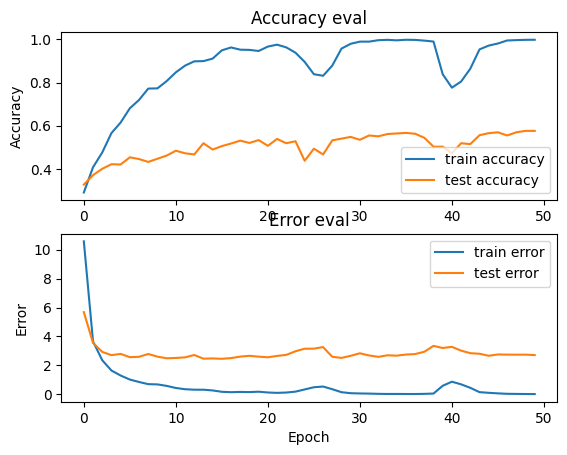

40/40 - 0s - 3ms/step - accuracy: 0.5656 - loss: 3.0292

Test accuracy: 0.5655999779701233


C:\Users\irver\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3367)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,724,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,872,842 (7.14 MB)

 Trainable params: 1,872,842 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1305 - loss: 58.0689 - val_accuracy: 0.2213 - val_loss: 5.1485
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1655 - loss: 14.8470 - val_accuracy: 0.2427 - val_loss: 3.8813
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1905 - loss: 8.2976 - val_accuracy: 0.2347 - val_loss: 3.5270
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1735 - loss: 6.6973 - val_accuracy: 0.2493 - val_loss: 3.5045
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1793 - loss: 5.4648 - val_accuracy: 0.2320 - val_loss: 3.4799
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1847 - loss: 4.7021 - val_accuracy: 0.2133 - val_loss: 3.4842
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2081 - loss: 4.1242 - val_accuracy: 0.2947 - val_loss: 3.3755
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2208 - loss: 3.9653 - val_accuracy: 

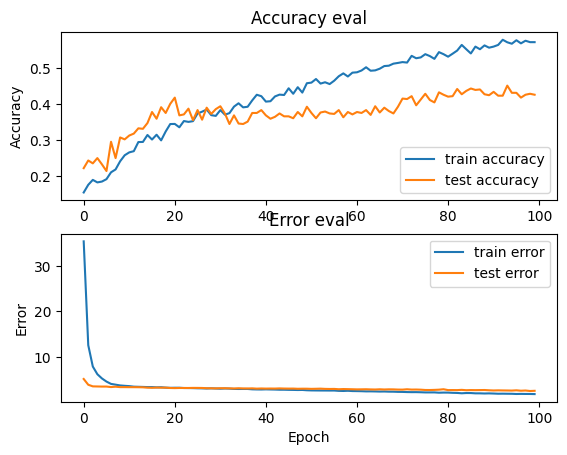

40/40 - 0s - 4ms/step - accuracy: 0.4344 - loss: 2.6665

Test accuracy: 0.4343999922275543


C:\Users\irver\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 257, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 129, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 129, 6, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 4, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,330 (313.79 KB)

 Trainable params: 80,138 (313.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1661 - loss: 2.8397 - val_accuracy: 0.2880 - val_loss: 1.9857
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3239 - loss: 2.0301 - val_accuracy: 0.4093 - val_loss: 1.6706
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4053 - loss: 1.6967 - val_accuracy: 0.4507 - val_loss: 1.4990
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4742 - loss: 1.5610 - val_accuracy: 0.4987 - val_loss: 1.4053
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4849 - loss: 1.4722 - val_accuracy: 0.5160 - val_loss: 1.3359
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5281 - loss: 1.3623 - val_accuracy: 0.5267 - val_loss: 1.2901
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5521 - loss: 1.2740 - val_accuracy: 0.5333 - val_loss: 1.2511
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5710 - loss: 1.2155 - val_accuracy: 0.5560 - v

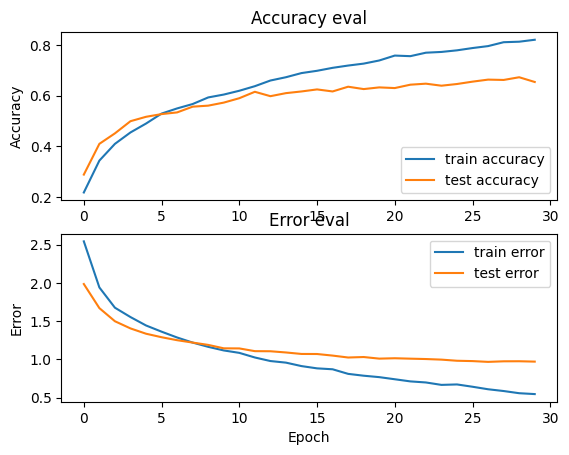

40/40 - 0s - 7ms/step - accuracy: 0.6736 - loss: 0.9337

Test accuracy: 0.6736000180244446


C:\Users\irver\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 259, 64)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.1457 - loss: 2.2769 - val_accuracy: 0.2293 - val_loss: 2.1591
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.2219 - loss: 2.1420 - val_accuracy: 0.2893 - val_loss: 2.0456
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.2892 - loss: 2.0341 - val_accuracy: 0.3520 - val_loss: 1.9388
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.3262 - loss: 1.9380 - val_accuracy: 0.4093 - val_loss: 1.8181
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.3628 - loss: 1.8315 - val_accuracy: 0.4280 - val_loss: 1.7144
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.3904 - loss: 1.7702 - val_accuracy: 0.4467 - val_loss: 1.6334
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.4181 - loss: 1.6490 - val_accuracy: 0.4613 - val_loss: 1.5682
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.4668 - loss: 1.5667 - val_accu

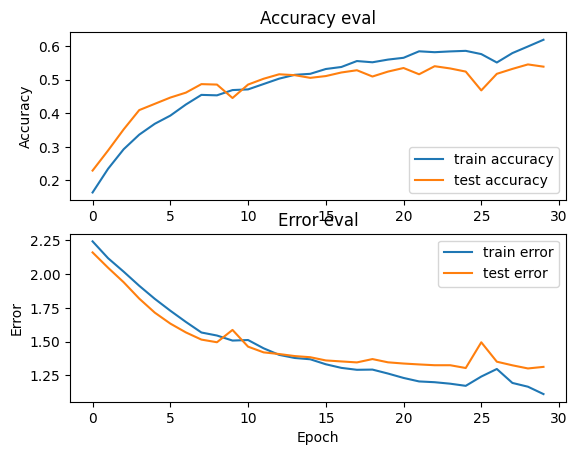

40/40 - 2s - 55ms/step - accuracy: 0.5696 - loss: 1.2205

Test accuracy: 0.569599986076355


In [6]:
if __name__ == "__main__":
    train_and_save_models()

# application_processor

In [6]:
from tensorflow.keras.models import load_model


def load_trained_models():
    """Загрузка обученных моделей"""
    mult_perc = load_model("multilayer_perceptron_model.keras")
    mult_perc_overfit_prev = load_model("multilayer_perceptron_with_overfitting_prevention_model.keras")
    cnn = load_model("CNN_model.keras")
    rnn_lstm = load_model("RNN_LSTM_model.keras")
    return mult_perc, mult_perc_overfit_prev, cnn, rnn_lstm


MULT_PERC, MULT_PERC_OVERFIT_PREV, CNN, RNN_LSTM = load_trained_models()
_, TAG_VALUES, TAG_NAMES = load_data()


MULT_PERC, MULT_PERC_OVERFIT_PREV, CNN, RNN_LSTM = load_trained_models()
_, TAG_VALUES, TAG_NAMES = load_data()


In [12]:

if __name__ == "__main__":
    app = QApplication.instance()  # Проверяем существующее приложение
    if app is None:
        app = QApplication([])

    window = MainWindow()
    window.show()

    app.exec_()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


# application_interface

In [7]:
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QPushButton, QRadioButton, QVBoxLayout, QWidget, QGroupBox, QFileDialog, QHBoxLayout, QFrame, QDesktopWidget
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont
import sys
import librosa
import numpy as np
from tensorflow.keras.models import load_model


class MainWindow(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle('НИР на тему: "Исследование технологий распознавания музыкальных жанров". Выполнил: ст.гр.143 И.Вербицкая')
        self.setGeometry(100, 100, 1500, 500)
        self.setFixedSize(1500, 500)
        self.center()

        # Создание заголовка
        title_label = QLabel("Распознавание музыкальных жанров")
        title_label.setAlignment(Qt.AlignCenter)
        title_label.setFont(QFont("Arial", 18, QFont.Bold))

        # Создание радиокнопок
        self.radio1 = QRadioButton("Многослойный персептрон")
        self.radio1.setChecked(True)
        self.radio2 = QRadioButton("Многослойный персептрон с предотвращением переобучения")
        self.radio3 = QRadioButton("CNN")
        self.radio4 = QRadioButton("RNN с LSTM")

        # Расположение радиокнопок в две колонки
        radio_layout = QHBoxLayout()
        column1 = QVBoxLayout()
        column2 = QVBoxLayout()
        column1.addWidget(self.radio1)
        column1.addWidget(self.radio2)
        column1.setAlignment(Qt.AlignCenter)
        column2.addWidget(self.radio3)
        column2.addWidget(self.radio4)
        column2.setAlignment(Qt.AlignCenter)
        radio_layout.addLayout(column1)
        radio_layout.addLayout(column2)
        radio_layout.setAlignment(Qt.AlignCenter)

        # Создание разделителя
        separator = QFrame()
        separator.setFrameShape(QFrame.HLine)
        separator.setFrameShadow(QFrame.Sunken)

        # Создание кнопки
        self.button = QPushButton("ВЫБРАТЬ ФАЙЛ")
        self.button.setFixedHeight(60)
        self.button.setFont(QFont("Arial", 14))
        self.button.clicked.connect(self.open_file_dialog)

        # Создание секции для отображения результата
        self.result_label = QLabel("Тут будет выведен результат распознавания")
        self.result_label.setAlignment(Qt.AlignCenter)
        self.result_label.setFont(QFont("Arial", 12))
        self.result_frame = QGroupBox("Результат распознавания")
        self.result_frame.setFixedHeight(200)  # увеличьте высоту для секции с результатами
        self.result_layout = QVBoxLayout()
        self.result_layout.addWidget(self.result_label)
        self.result_frame.setLayout(self.result_layout)

        # Основной макет
        main_layout = QVBoxLayout()
        main_layout.addWidget(title_label)
        main_layout.addWidget(separator)
        main_layout.addLayout(radio_layout)
        main_layout.addWidget(self.button)
        main_layout.addWidget(self.result_frame)
        
        container = QWidget()
        container.setLayout(main_layout)
        self.setCentralWidget(container)
        
        # Применение стилей
        self.setStyleSheet("""
            QMainWindow {
                background-color: #F8F8FF;
            }
            QLabel {
                color: #333;
            }
            QRadioButton {
                font-size: 14px;
                color: #333;
            }
            QPushButton {
                background-color: #FFB6C1;
                border: 2px solid #FF69B4;
                border-radius: 10px;
                padding: 10px 20px;
                font-size: 14px;
                color: #333;
            }
            QPushButton:hover {
                background-color: #FF69B4;
            }
            QGroupBox {
                font-size: 14px;
                color: #333;
                background-color: #FFF0F5;
                border: 2px solid #FF69B4;
                border-radius: 5px;
                margin-top: 10px;
                padding: 10px;
            }
            QFrame {
                border: 1px solid #FF69B4;
                margin: 20px 0;
            }
        """)

    def center(self):
        """Центрирование окна на экране"""
        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())

    def open_file_dialog(self):
        """Открытие диалогового окна для выбора файла и обработка выбранного файла"""
        file_name, _ = QFileDialog.getOpenFileName(self, "Выбрать файл", "", "MP3 Files (*.mp3);;All Files (*)")
        if file_name:
            if file_name.endswith('.mp3'):
                duration = librosa.get_duration(path=file_name)
                if duration > 40:
                    model = MULT_PERC if self.radio1.isChecked() else MULT_PERC_OVERFIT_PREV if self.radio2.isChecked() else CNN if self.radio3.isChecked() else RNN_LSTM
                    mfcc = get_music_mfcc(file_name)
                    res = predict(model, mfcc, TAG_VALUES, TAG_NAMES)
                    self.result_label.setText(res)
                else:
                    self.result_label.setText("Продолжительность файла должна быть больше 40 секунд.")
        else:
            self.result_label.setText("Выбранный файл не является файлом формата mp3.")
                
                
 